# Demo

## Would you survive in titanic?

This is an example to show how interactive the jupyter notebook is by running some machine learning models on titanic passengers data to decide whether you would survive in titanic or not

### Typical Process:
1. Hypothesis
2. Data exploration
3. Model building
4. Applying results
5. Share findings (and collaborate with line-of-business partners)

## Why Jupyter ? 


## Dataset
 - ~ 800 records 

## Data Storage
 - The input training data and output models are/will be stored on GCP Buckets

### Importing the required packages

In [1]:
!pip install gcsfs

In [2]:
import numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gcsfs
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf
from tensorflow.contrib import learn as skflow
from sklearn.externals import joblib


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
sns.set(style='darkgrid')


## Data Dictionary
|Variable   |Definition   |Key   |
|:-:|:-:|:-:|
|survival   |Survival   |0=No, Yes=1   |
|pclass   |Ticket class   |1 = 1st, 2 = 2nd, 3 = 3rd   |
|sex   |Sex   |   |
|age   |Age   |   |
|sibsp   |no. of siblings/spouses aboard titanic  |   |
|parch   |no. of parents/children aboard titanic   |   |
|ticket   |Ticket Number   |   |
|fare   |Passenger Fare   |   |
|cabin   |Cabin Number   |   |
|embarked   |Port of Embarkation   |C = Cherbourg, Q = Queenstown, S = Southampton   |


## Variable Notes:


**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
**Parent** = mother, father
**Child** = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



### Importing the dataset from the storage bucket

In [4]:
fs = gcsfs.GCSFileSystem(project='thinkbigdevlopment')
with fs.open('thinkbigdevelopment_titanic_dataset/train.csv') as f:
    df_train = pd.read_csv(f)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
fs

### Some simple stats about the dataset

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## The count of survived passengers vs unsurvived passengers

/usr/local/envs/py3env/lib/python3.5/site-packages/seaborn/categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


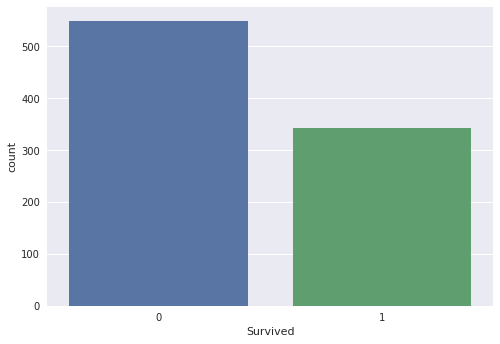

In [6]:
sns.countplot(x='Survived', data=df_train);

## The count of survived passengers vs unsurvived passengers categorized in male and female

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/envs/py3env/lib/python3.5/site-packages/seaborn/categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


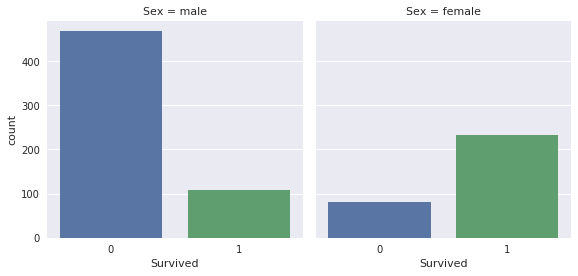

In [7]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);

## The count of survived passengers vs unsurvived passengers categorized in passenger classes

In [ ]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train);

### The count of the passengers vs the amount of fare

In [ ]:
sns.distplot(df_train.Fare, kde=False);

### All possible stats between features plus highlighting who survived and who isn't

In [ ]:
sns.pairplot(df_train, hue='Survived');

In [ ]:
age_plcass = sns.stripplot(x='Age', y='Pclass', hue='Survived', data=df_train, alpha=0.3)
age_plcass.set_xscale('linear')
age_plcass

## Making some pre-processing actions like labeling discrete string values to numbers and droping unused columns

In [ ]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    print(dict(zip(df.Sex, processed_df.Sex)))
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    print(dict(zip(df.Embarked, processed_df.Embarked)))
    processed_df = processed_df.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1)
    return processed_df
df_train = df_train.dropna()
df_train = preprocess_titanic_df(df_train)

## Splitting dataset

In [ ]:
X = df_train.drop(['Survived'], axis=1).values
y = df_train['Survived'].values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

## Training a Decision tree Classification model

In [ ]:
clf_dt = tree.DecisionTreeClassifier(max_depth=20)
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

# Training a Decision tree Classification model (selecting depth)

In [ ]:
depths=[10,20,30,40]
best_depth = -1
best_score= 0
best_model = None

for depth in depths:
  clf_dt = tree.DecisionTreeClassifier(max_depth=depth)
  clf_dt.fit (X_train, y_train)
  score=clf_dt.score (X_test, y_test)  
  print ("depth: {}, score: {}".format(depth, score))
  
  if score > best_score:
    best_depth = depth
    best_score = score
    best_model = clf_dt

print("best model with depth: {} and score: {} selected".format(best_depth, best_score))


## Saving The Best Model (for using later)

In [ ]:
joblib.dump(best_model, 'Dtree.joblib')

In [ ]:
!gsutil cp ./Dtree.joblib gs://thinkbigdevelopment_titanic_models/model.joblib

#### Let's check our model on GCP Storage Bucket

## Loading the model & making predictions 

In [ ]:
loaded_model=joblib.load('Dtree.joblib')

In [ ]:
# Class, Sex, Age, Siblings, Parents, Fare, EntryStation
inpt=[1, 0, 28, 0, 0, 870, 1]
pred = loaded_model.predict([inpt])
pred[0]

In [ ]:
#shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
#def test_classifier(clf):
#    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
#    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))   
#test_classifier(clf_dt)

# Training a Random Forest Classification model and making predictions

In [ ]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf.fit (X_train, y_train)
score=clf_rf.score (X_test, y_test)
print("score is:", score)
clf_rf.predict([inpt])[0]

# Training a Gradient Boost Classification model and making predictions

In [ ]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
clf_gb.fit(X_train, y_train)
score=clf_gb.score(X_test, y_test)
print("score is:", score)
clf_gb.predict([inpt])[0]

In [ ]:
#eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
#test_classifier(eclf)